Ana Xavier :



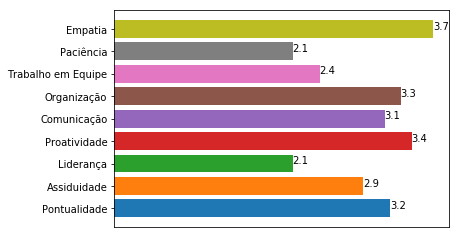

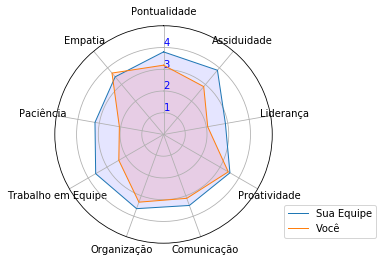

Arthur Lins :



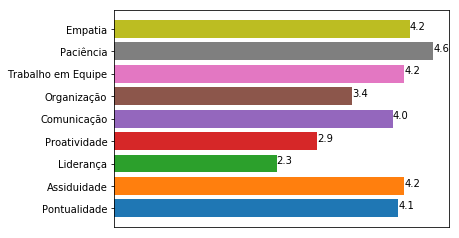

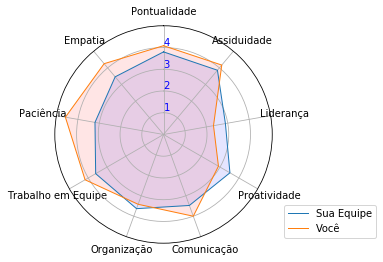

Diego Hamilton :



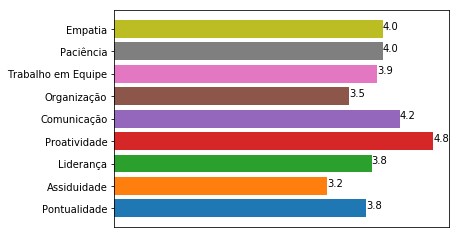

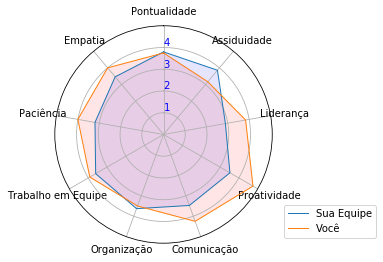

Diogo Henrique :



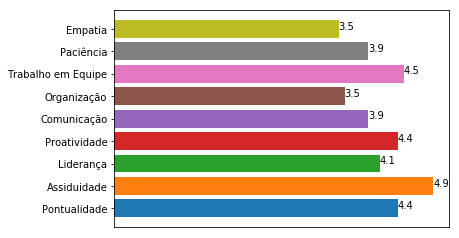

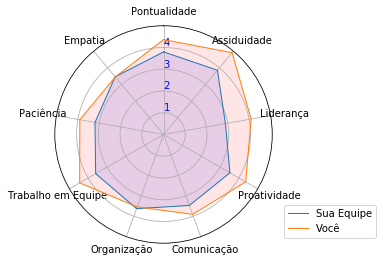

Felipe Nunes :



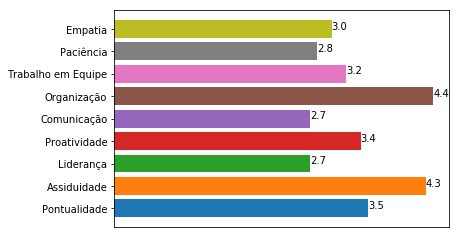

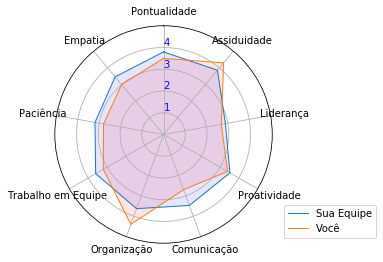

Gabriel Santiago :



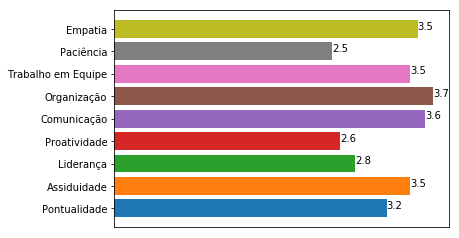

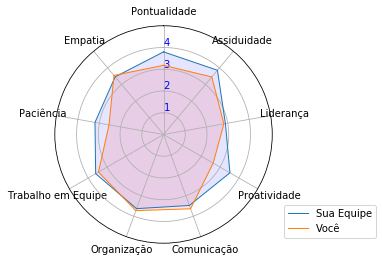

Guilherme Cantalice :



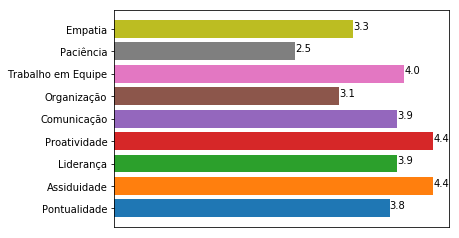

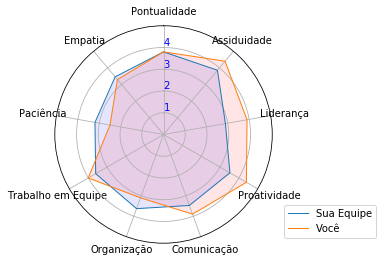

Guilherme Soares :



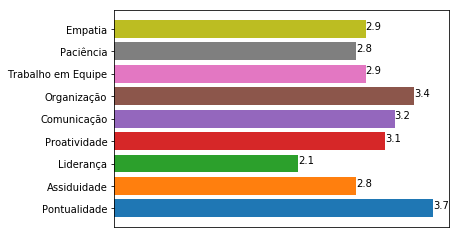

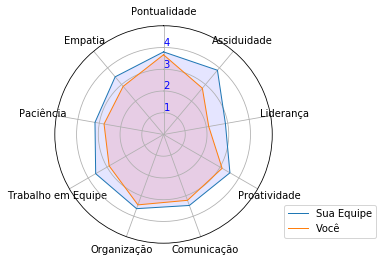

Halenildo :



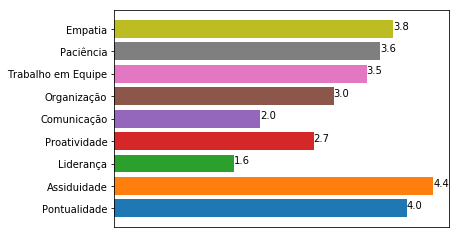

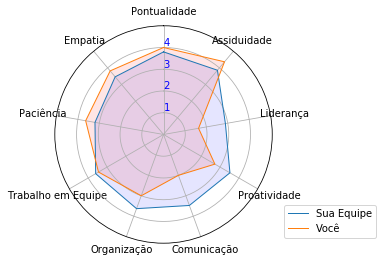

Hamurabi Paulino :



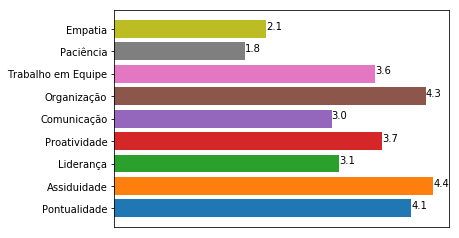

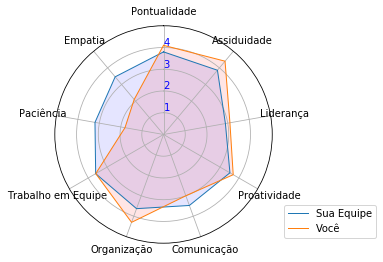

Jerônimo Matheus :



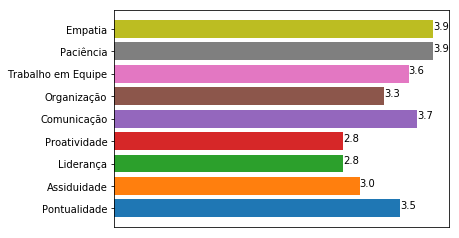

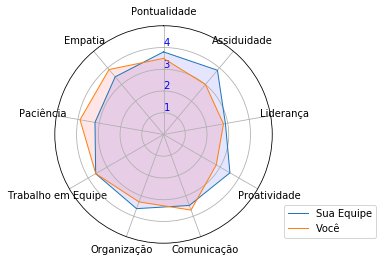

Josane Assunção :



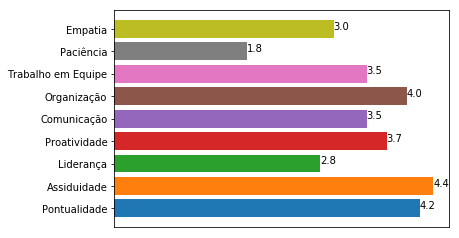

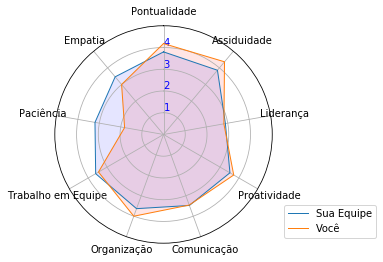

Matheus Lourenço :



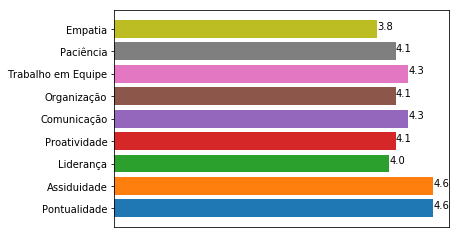

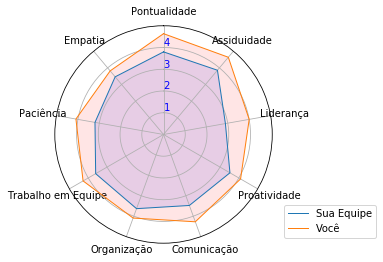

Phellipe Pontes :



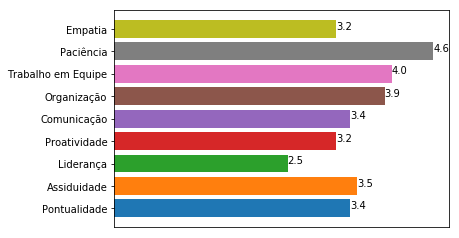

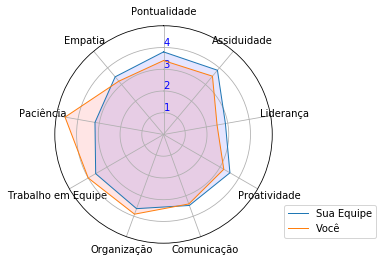

In [12]:
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn
import sys

# Load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from math import pi

#Take1 - Informações contidas no relatório
#1.Resumo dos resultados 

# Load dataset
group_name = "Mangue Baja"
form = "MangueBaja.csv"
parametros = ['data', 'e-mail', 'Avaliador', 'Avaliado','Pontualidade', 'Assiduidade', 'Liderança', 'Proatividade', 'Comunicação', 'Organização', 'Trabalho em Equipe', 'Paciência','Empatia', 'start', 'stop', 'continue']
dataset = pandas.read_csv(form, skiprows = 1, names=parametros)

#def draw_radar()
#print(dataset.groupby('Avaliado').mean())




media_avaliados = dataset.groupby('Avaliado').mean()           #media dos avaliados
competencia = []
nota = []
#print (media_avaliados)

for i in range (len(media_avaliados)):
    avaliado = media_avaliados.index[i] #recebe o nome do avaliado
    print(avaliado,":\n")
    j = 0
    competencia.clear()      #limpa os vetores a cada novo avaliado
    nota.clear()


    #carrega o vetor com as competencias e respectivas médias
    for j in range(9): 
        competencia.insert(j,media_avaliados.columns[j])
        nota.insert(j, media_avaliados.loc[avaliado, competencia[j]])
        plt.text(nota[j],competencia[j],str(round(nota[j],1)))
        plt.barh(competencia[j], nota[j]) 
    
    #grafico de barras
    plt.gca().axes.get_xaxis().set_visible(False)   #exclui eixo x
    plt.show()
    
    media_geral = dataset.mean() #media geral
    #for i in range(9):
    #    print(media_geral.index[i],":\n",media_geral[i])

    N = len(media_geral)
    #angulo do radar = 2pi/quantidade de competencias 

    angles = [n / float(N) * 2 * pi for n in range(N)] 
    angles += angles[:1]  #completando o círculo 360.

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Draw one axe per variable + add labels labels yet -- indexa cada angulo à atribuição
    plt.xticks(angles[:-1], media_geral.index)

    #Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4],["1", "2", "3", "4"], color="blue")
    plt.ylim(0,5)

    #radar do grupo:
    values=media_geral.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Sua Equipe")
    ax.fill(angles, values, 'b', alpha=0.1)

    #radar individual

    values= nota
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Você")
    ax.fill(angles, values, 'r', alpha=0.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2))
    plt.show()
    #legenda:
    

#plt.barh(media_avaliados[0:1])
#for i in range (len(media_avaliados)):
#media_avaliados[0:1].apply(plt.barh,axis=0)   #tentar gerar gráfico com essas informações
    #print('\n')

#print(dataset.groupby('Avaliado').cumcount())



#avaliados = pandas.read_csv(form, skiprows = 1, names=parametros, usecols=['Avaliado'], nrows = i)
#n = dataset.groupby('Avaliado').size()






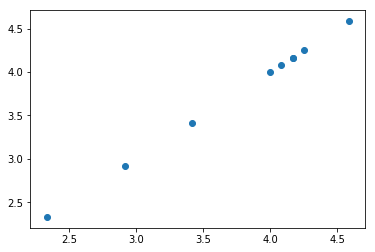

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans, vq, whiten

fig = plt.figure()
#ax = fig.gca(projection='3d')

#normalizar
whitened = whiten(media_avaliados.values)
#centros dos clusters
centroids,_ = kmeans(whitened, 4)
#retorna os índices para os pontos que estão agrupado
idx,_ = vq(whitened,centroids)

plt.scatter(media_avaliados.values[idx==1],media_avaliados.values[idx==1] )

#ax.scatter(centroids[:,0],centroids[:,1])
plt.show()

#função para fazer agrupamento: kmeans

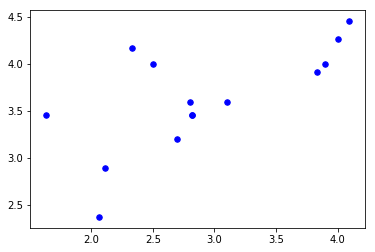

In [20]:
#recebendo e plotando os valores de Liderança x Trabalho em equipe

f1 = media_avaliados["Liderança"].values
f2 = media_avaliados["Trabalho em Equipe"].values
x = np.array(list(zip(f1, f2))) 
plt.scatter(f1, f2, c=['blue'], s=30)